In [1]:
import os
import time
import uuid
import cv2

In [212]:
IMAGES_PATH = os.path.join('deepface_detection/data/images/')
number_images = 30

In [211]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting Image{}: '.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH, f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.9.0) /io/opencv/modules/highgui/src/window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [18]:
!labelme

2024-01-28 21:27:35,253 [INFO   ] __init__:get_config:67- Loading config file from: /home/rutpatel/.labelmerc


In [7]:
import tensorflow as tf
import json 
import numpy as np
from matplotlib import pyplot as plt

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

2024-01-30 19:47:30.151639: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-30 19:47:30.255722: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-30 19:47:30.255963: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [5]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2024-01-30 19:47:30.307325: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-30 19:47:30.307848: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-30 19:47:30.308175: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

True

In [7]:
images = tf.data.Dataset.list_files(r'deepface_detection/data/images/*.jpg', shuffle=False)

InvalidArgumentError: Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'No files matched pattern: deepface_detection/data/images/*.jpg'

In [29]:
images.as_numpy_iterator().next()

b'deepface_detection/data/images/012c2420-bdf4-11ee-9f71-01bc8198e37c.jpg'

In [6]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [31]:
images = images.map(load_image)
images.as_numpy_iterator().next()

array([[[114, 110, 109],
        [115, 111, 110],
        [117, 113, 112],
        ...,
        [210, 223, 229],
        [212, 223, 227],
        [204, 215, 217]],

       [[115, 111, 110],
        [116, 112, 111],
        [118, 114, 113],
        ...,
        [212, 225, 233],
        [213, 224, 230],
        [206, 217, 221]],

       [[114, 112, 113],
        [114, 112, 113],
        [115, 113, 114],
        ...,
        [213, 223, 233],
        [212, 221, 230],
        [207, 216, 223]],

       ...,

       [[ 46,  33,  24],
        [ 45,  33,  21],
        [ 43,  33,  21],
        ...,
        [ 40,  34,  20],
        [ 40,  34,  20],
        [ 40,  34,  20]],

       [[ 47,  34,  25],
        [ 46,  34,  22],
        [ 44,  34,  22],
        ...,
        [ 39,  36,  21],
        [ 39,  35,  23],
        [ 39,  35,  23]],

       [[ 46,  33,  24],
        [ 46,  34,  22],
        [ 44,  34,  22],
        ...,
        [ 39,  36,  21],
        [ 39,  35,  23],
        [ 39,  35,  23]]

In [48]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

In [9]:
image_generator = images.batch(4).as_numpy_iterator()

NameError: name 'images' is not defined

In [8]:
plot_images = image_generator.next()

NameError: name 'image_generator' is not defined

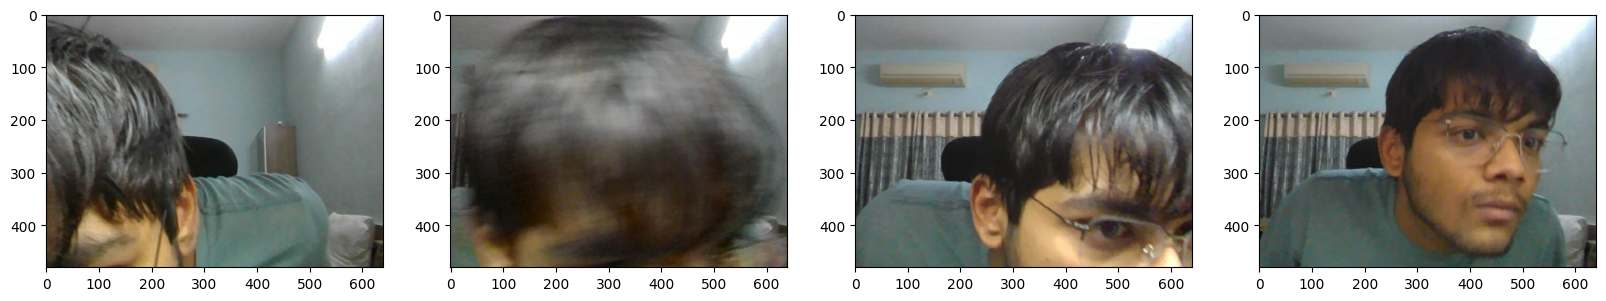

In [58]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

In [61]:
for folder in ['train', 'test', 'val']:
    for file in os.listdir(os.path.join('deepface_detection', folder, 'images')):
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('deepface_detection', 'labels', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('deepface_detection', folder, 'labels', filename)
            os.replace(existing_filepath, new_filepath)

In [7]:
import albumentations as alb

In [8]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450),
                         alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                         bbox_params=alb.BboxParams(format='albumentations', 
                                                    label_fields=['class_labels']))

In [9]:
img = cv2.imread(os.path.join('deepface_detection', 'train', 'images', 'b4520e80-bdf3-11ee-9f71-01bc8198e37c.jpg'))

In [10]:
with open(os.path.join('deepface_detection', 'train', 'labels', 'b4520e80-bdf3-11ee-9f71-01bc8198e37c.json'), 'r') as f:
    label = json.load(f)

In [11]:
label['shapes'][0]['points']

[[206.9140625, 54.06249999999999], [451.0546875, 376.71875]]

In [12]:
coords = [0, 0, 0, 0]
coord_label = 0
for i in range(2):
    for j in range(2):
        coords[coord_label] = label['shapes'][0]['points'][i][j] 
        coord_label+=1

In [13]:
coords

[206.9140625, 54.06249999999999, 451.0546875, 376.71875]

In [14]:
import numpy as np
coords = list(np.divide(coords, [640, 480, 640, 480]))

In [15]:
coords

[0.32330322265625, 0.11263020833333331, 0.70477294921875, 0.7848307291666666]

In [16]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])


In [17]:
augmented['bboxes'][0]


(0.37765625, 0.0823611111111111, 0.9201909722222222, 0.799375)

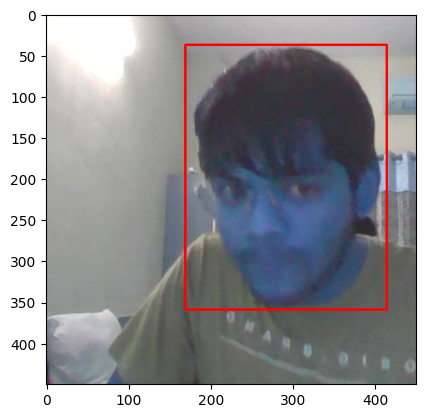

In [18]:
cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2], [450, 450]).astype(int)),
                    tuple(np.multiply(augmented['bboxes'][0][2:], [450, 450]).astype(int)),
                          (255, 0, 0), 2)

plt.imshow(augmented['image'])

In [19]:
for partition in ['train', 'test', 'val']:
    for image in os.listdir(os.path.join('deepface_detection', partition, 'images')):
        img = cv2.imread(os.path.join('deepface_detection', partition, 'images', image))

        coords = [0, 0, 0.00001, 0.00001]
        label_path = os.path.join('deepface_detection', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coord_label = 0
            for i in range(2):
                for j in range(2):
                    coords[coord_label] = label['shapes'][0]['points'][i][j] 
                    coord_label+=1
            coords = list(np.divide(coords, [640, 480, 640, 480]))

        try:
            for x in range(60):
                augmented = augmentor(image = img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('deepface_detection','data_aug', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image
                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0:
                        annotation['bbox'] = [0, 0, 0, 0]
                        annotation['class'] = 0
                    else:
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else:
                    annotation['bbox'] = [0, 0, 0, 0]
                    annotation['class'] = 0

                with open(os.path.join('deepface_detection', 'data_aug', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

                

            

x_max is less than or equal to x_min for bbox [0.99835205078125, 0.9671223958333334, 0.8231626929306403, 0.9979166666666667, 'face'].
x_max is less than or equal to x_min for bbox [0.16400146484375003, 0.7669270833333334, 0.0, 0.5212230705492423, 'face'].


In [19]:
#Load Augmented Images to Tensorflow Dataset
train_images = tf.data.Dataset.list_files(r'deepface_detection/data_aug/train/images/*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120, 120)))
train_images = train_images.map(lambda x: x/255)

2024-01-30 20:08:19.288057: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-30 20:08:19.288431: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-30 20:08:19.288705: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [20]:
test_images = tf.data.Dataset.list_files(r'deepface_detection/data_aug/test/images/*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120, 120)))
test_images = test_images.map(lambda x: x/255)

In [21]:
val_images = tf.data.Dataset.list_files(r'deepface_detection/data_aug/val/images/*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120, 120)))
val_images = val_images.map(lambda x: x/255)

In [129]:
val_images.as_numpy_iterator().next()

array([[[0.3490809 , 0.40055147, 0.39123774],
        [0.3449755 , 0.39773285, 0.37371323],
        [0.34068626, 0.40018383, 0.38253677],
        ...,
        [0.43756127, 0.47677696, 0.43854168],
        [0.42879903, 0.43811274, 0.4221201 ],
        [0.3557598 , 0.37340686, 0.37009802]],

       [[0.3259804 , 0.40373775, 0.39558825],
        [0.31666666, 0.39656863, 0.3867647 ],
        [0.31084558, 0.40741423, 0.39221814],
        ...,
        [0.34583333, 0.3875    , 0.33210784],
        [0.36464462, 0.37916666, 0.34099266],
        [0.38523284, 0.3920956 , 0.36611518]],

       [[0.3137255 , 0.40392157, 0.38039216],
        [0.31415442, 0.4043505 , 0.37984067],
        [0.31029412, 0.40833333, 0.38480392],
        ...,
        [0.36072305, 0.39123774, 0.33284312],
        [0.3779412 , 0.39503676, 0.33927697],
        [0.3944853 , 0.4026348 , 0.3629902 ]],

       ...,

       [[0.5228554 , 0.5463848 , 0.5434436 ],
        [0.51121324, 0.53474265, 0.5268995 ],
        [0.5147059 , 0

In [23]:
#Preparing the labels
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding='utf-8') as f:
        label = json.load(f)
    
    return [label['class']], label['bbox']
    

In [27]:
train_labels = tf.data.Dataset.list_files(r'deepface_detection/data_aug/train/labels/*.json', shuffle=False)
train_labels.as_numpy_iterator().next()

b'deepface_detection/data_aug/train/labels/012c2420-bdf4-11ee-9f71-01bc8198e37c (copy).0.json'

In [28]:
train_labels = tf.data.Dataset.list_files(r'deepface_detection/data_aug/train/labels/*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [29]:
test_labels = tf.data.Dataset.list_files(r'deepface_detection/data_aug/test/labels/*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))


In [30]:
val_labels = tf.data.Dataset.list_files(r'deepface_detection/data_aug/val/labels/*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [33]:
test_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.3074, 0.    , 1.    , 0.746 ], dtype=float16))

In [34]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3840, 3840, 1140, 1140, 840, 840)

In [35]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [36]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [37]:
'''import pandas as pd
data_training = []
data_labeling = []
path_data = 'deepface_detection/data_aug/train/images/'
path_labels = 'deepface_detection/data_aug/train/labels/'
for file in os.listdir(path_data):
    data_train = os.path.join(path_data, file)
    data_training.append(data_train)
def load_labels(label_path):
    with open(label_path, 'r') as f:
        label = json.load(f)
    
    return [label['class']], label['bbox']

for file in os.listdir(path_labels):
    data_labels = os.path.join(path_labels, file)
    data_labels = load_labels(data_labels)
    data_labeling.append(data_labels)

df = pd.DataFrame(data_training, columns=['Features'])
df['Labels'] = data_labeling
df'''

"import pandas as pd\ndata_training = []\ndata_labeling = []\npath_data = 'deepface_detection/data_aug/train/images/'\npath_labels = 'deepface_detection/data_aug/train/labels/'\nfor file in os.listdir(path_data):\n    data_train = os.path.join(path_data, file)\n    data_training.append(data_train)\ndef load_labels(label_path):\n    with open(label_path, 'r') as f:\n        label = json.load(f)\n    \n    return [label['class']], label['bbox']\n\nfor file in os.listdir(path_labels):\n    data_labels = os.path.join(path_labels, file)\n    data_labels = load_labels(data_labels)\n    data_labeling.append(data_labels)\n\ndf = pd.DataFrame(data_training, columns=['Features'])\ndf['Labels'] = data_labeling\ndf"

In [159]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1200)
val = val.batch(8)
val = val.prefetch(4)
val.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [0.59246325, 0.56893384, 0.56893384],
          [0.5754289 , 0.5661765 , 0.5575368 ],
          [0.5783701 , 0.5744485 , 0.5624387 ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [0.5872549 , 0.5715686 , 0.5598039 ],
          [0.57395834, 0.55735296, 0.54558825],
          [0.5761642 , 0.5602941 , 0.5534314 ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [0.5764706 , 0.56078434, 0.54901963],
          [0.5768995 , 0.5577819 , 0.54601717],
          [0.57169116, 0.5545343 , 0.5427696 ]],
 
         ...,
 
         [[0.45508578, 0.4393995 , 0.39626226],
          [0.44552

In [132]:
data_samples = train.as_numpy_iterator()
res = data_samples.next()
print(res)
print(res[0].shape)

(array([[[[0.51525736, 0.5088848 , 0.5083946 ],
         [0.5124387 , 0.50851715, 0.500674  ],
         [0.5205882 , 0.51666665, 0.5088235 ],
         ...,
         [0.5514706 , 0.575     , 0.575     ],
         [0.57665443, 0.6045956 , 0.5962623 ],
         [0.6030637 , 0.6310049 , 0.62352943]],

        [[0.5088235 , 0.5058824 , 0.48921567],
         [0.50490195, 0.5019608 , 0.4853554 ],
         [0.51280636, 0.5098652 , 0.49368873],
         ...,
         [0.5568015 , 0.5920956 , 0.58817405],
         [0.58278185, 0.61856616, 0.6146446 ],
         [0.5957721 , 0.63143384, 0.62438726]],

        [[0.49099264, 0.4949142 , 0.4713848 ],
         [0.49460784, 0.4985294 , 0.475     ],
         [0.49803922, 0.5019608 , 0.48235294],
         ...,
         [0.5491422 , 0.5844363 , 0.5805147 ],
         [0.5711397 , 0.6064338 , 0.60251224],
         [0.5963848 , 0.63167894, 0.6248162 ]],

        ...,

        [[0.27089462, 0.30569854, 0.27579656],
         [0.27444854, 0.29454657, 0.27199754

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


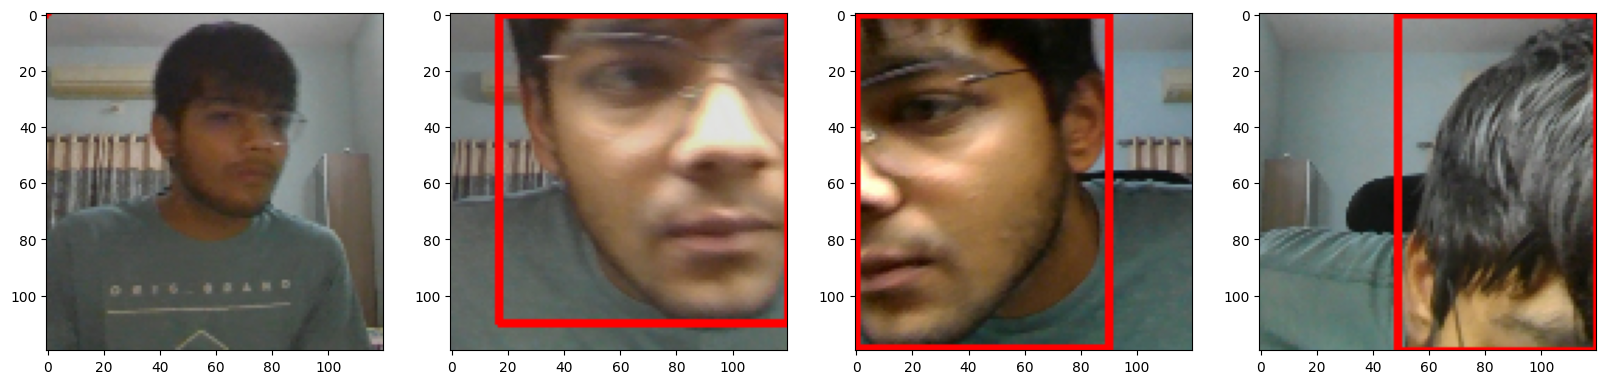

In [133]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx in range(4):
    sample_image = np.copy(res[0][idx])
    sample_coords = res[1][1][idx]

    cv2.rectangle(sample_image,
                  tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int)),
                        (255, 0, 0), 2)
    ax[idx].imshow(sample_image)

In [134]:
from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Add, GlobalMaxPooling2D
from keras.applications import VGG16

In [135]:
def build_model():
    input_layer = Input(shape=(120, 120, 3))
    conv_base = VGG16(include_top=False)(input_layer)
    
    #Classification Model
    f1 = GlobalMaxPooling2D()(conv_base)
    class1= Dense(2048, activation='relu')(f1)
    class2= Dense(1, activation='sigmoid')(class1)

    f2 = GlobalMaxPooling2D()(conv_base)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)

    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [136]:
facetracker = build_model()

In [137]:
facetracker.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_7[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d_4 (Gl  (None, 512)                  0         ['vgg16[0][0]']               
 obalMaxPooling2D)                                                                                
                                                                                            

In [187]:
X, y = train.as_numpy_iterator().next()

In [139]:
type(X)

numpy.ndarray

In [140]:
(y)

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1]], dtype=uint8),
 array([[0.542  , 0.2693 , 1.     , 1.     ],
        [0.     , 0.     , 1.     , 1.     ],
        [0.504  , 0.2435 , 1.     , 1.     ],
        [0.524  , 0.2301 , 1.     , 1.     ],
        [0.     , 0.     , 1.     , 1.     ],
        [0.     , 0.02405, 0.5938 , 1.     ],
        [0.     , 0.     , 0.     , 0.     ],
        [0.2568 , 0.3516 , 0.8115 , 1.     ]], dtype=float16))

In [141]:
X.shape

(8, 120, 120, 3)

In [142]:
len(train)

480

In [143]:
batches_per_epoch = len(train)
lr_decay = (1./0.75-1)/batches_per_epoch

In [144]:
steps_per_epoch = batches_per_epoch

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=steps_per_epoch,
    decay_rate=lr_decay,
    staircase=True)

opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)


In [145]:
def localization_loss(y_true, yhat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:, :2] - yhat[:, :2]))

    h_true = y_true[:, 3] - y_true[:, 1]
    w_true = y_true[:, 2] - y_true[:, 0]

    h_pred = yhat[:, 3] - yhat[:, 1]
    w_pred = yhat[:, 2] - yhat[:, 0]

    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true - h_pred))

    return delta_coord + delta_size

In [146]:
classloss = keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [186]:
class FaceTracker(Model):
    def __init__(self, facetracker, **kwargs):
        super().__init__(**kwargs)
        self.model = facetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs=classloss
        self.lloss=localizationloss
        self.opt=opt

    def train_step(self, batch, **kwargs):
        X, y = batch

        with tf.GradientTape() as tape:
            classes, coords = self.model(X, training=True)
            '''tf.print("Classes:", classes)
            tf.print("Coordinates:", coords)'''

            batch_classloss=self.closs(y[0], classes)
            batch_localizationloss=self.lloss(tf.cast(y[1], tf.float32), coords)

            total_loss = batch_localizationloss+0.5*batch_classloss
            grad = tape.gradient(total_loss, self.model.trainable_variables) 
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))

        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs):
        X, y = batch

        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def call(self, X, **kwargs):
        return self.model(X, **kwargs)
        

In [161]:
'''facetracker.compile(optimizer=optimizer, loss=['binary_crossentropy', regressloss], metrics=['accuracy'])

from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Specify the path to your image
image_arrays = []

for image_path in df['Features']:
    # Load the image, ensuring the image size matches the input size of your model
    loaded_image = load_img(image_path, target_size=(120, 120))
    
    # Convert the image to a NumPy array
    image_array = img_to_array(loaded_image)
    
    # Optionally, you might need to scale the pixel values, e.g., if you need them to be in [0, 1]
    image_array = image_array / 255.0
    
    # Add to list
    image_arrays.append(image_array)

# Optionally, convert the list of arrays to a single NumPy array
image_arrays = np.array(image_arrays)
print(len(image_arrays))
    '''

"facetracker.compile(optimizer=optimizer, loss=['binary_crossentropy', regressloss], metrics=['accuracy'])\n\nfrom tensorflow.keras.preprocessing.image import load_img, img_to_array\n\n# Specify the path to your image\nimage_arrays = []\n\nfor image_path in df['Features']:\n    # Load the image, ensuring the image size matches the input size of your model\n    loaded_image = load_img(image_path, target_size=(120, 120))\n    \n    # Convert the image to a NumPy array\n    image_array = img_to_array(loaded_image)\n    \n    # Optionally, you might need to scale the pixel values, e.g., if you need them to be in [0, 1]\n    image_array = image_array / 255.0\n    \n    # Add to list\n    image_arrays.append(image_array)\n\n# Optionally, convert the list of arrays to a single NumPy array\nimage_arrays = np.array(image_arrays)\nprint(len(image_arrays))\n    "

In [162]:
'''y1 = df['Class'].apply(lambda x: x[0]).values
y2 = df['Bbox'].apply(lambda x: x[0]).values
y1
y2
facetracker.compile(optimizer=optimizer, loss=['binary_crossentropy', 'mean_squared_error'], metrics=['accuracy'])'''

"y1 = df['Class'].apply(lambda x: x[0]).values\ny2 = df['Bbox'].apply(lambda x: x[0]).values\ny1\ny2\nfacetracker.compile(optimizer=optimizer, loss=['binary_crossentropy', 'mean_squared_error'], metrics=['accuracy'])"

In [163]:
#facetracker.fit(image_arrays, [y1, y2], validation_split=0.2, batch_size=64, epochs=100)

In [164]:
model = FaceTracker(facetracker)

In [165]:
model.compile(opt, classloss, regressloss)

In [166]:
#Training the model
logdir='logs'

In [167]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [195]:
history = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
480/480 [==============================] - 21s 41ms/step - total_loss: 0.6866 - class_loss: 0.2763 - regress_loss: 0.5484 - val_total_loss: 0.8169 - val_class_loss: 0.3943 - val_regress_loss: 0.6197
Epoch 2/10
480/480 [==============================] - 23s 41ms/step - total_loss: 0.6861 - class_loss: 0.2761 - regress_loss: 0.5480 - val_total_loss: 0.9629 - val_class_loss: 0.5963 - val_regress_loss: 0.6647
Epoch 3/10
480/480 [==============================] - 24s 44ms/step - total_loss: 0.6891 - class_loss: 0.2769 - regress_loss: 0.5507 - val_total_loss: 1.4135 - val_class_loss: 0.8371 - val_regress_loss: 0.9950
Epoch 4/10
480/480 [==============================] - 24s 43ms/step - total_loss: 0.6855 - class_loss: 0.2758 - regress_loss: 0.5475 - val_total_loss: 0.7549 - val_class_loss: 0.5160 - val_regress_loss: 0.4969
Epoch 5/10
480/480 [==============================] - 27s 45ms/step - total_loss: 0.6851 - class_loss: 0.2756 - regress_loss: 0.5472 - val_total_loss: 1.5269 - 

In [196]:
history.history

{'total_loss': [0.9635329246520996,
  0.7098643779754639,
  2.1822495460510254,
  0.4246067404747009,
  0.23392799496650696,
  0.336080938577652,
  0.4953376054763794,
  0.2692895531654358,
  0.326153963804245,
  0.2046586275100708],
 'class_loss': [0.43414589762687683,
  0.3058253824710846,
  0.7126421928405762,
  0.1871330440044403,
  0.09710225462913513,
  0.11841732263565063,
  0.24774333834648132,
  0.0950704962015152,
  0.11083344370126724,
  0.06853313744068146],
 'regress_loss': [0.7464599609375,
  0.5569517016410828,
  1.8259284496307373,
  0.3310402035713196,
  0.1853768676519394,
  0.27687227725982666,
  0.37146592140197754,
  0.2217543125152588,
  0.2707372307777405,
  0.17039205133914948],
 'val_total_loss': [0.8168807625770569,
  0.962867021560669,
  1.4135075807571411,
  0.7549409866333008,
  1.5268855094909668,
  0.9191622138023376,
  1.0705013275146484,
  0.9350987672805786,
  0.5802308320999146,
  1.0955944061279297],
 'val_class_loss': [0.3943396508693695,
  0.596285

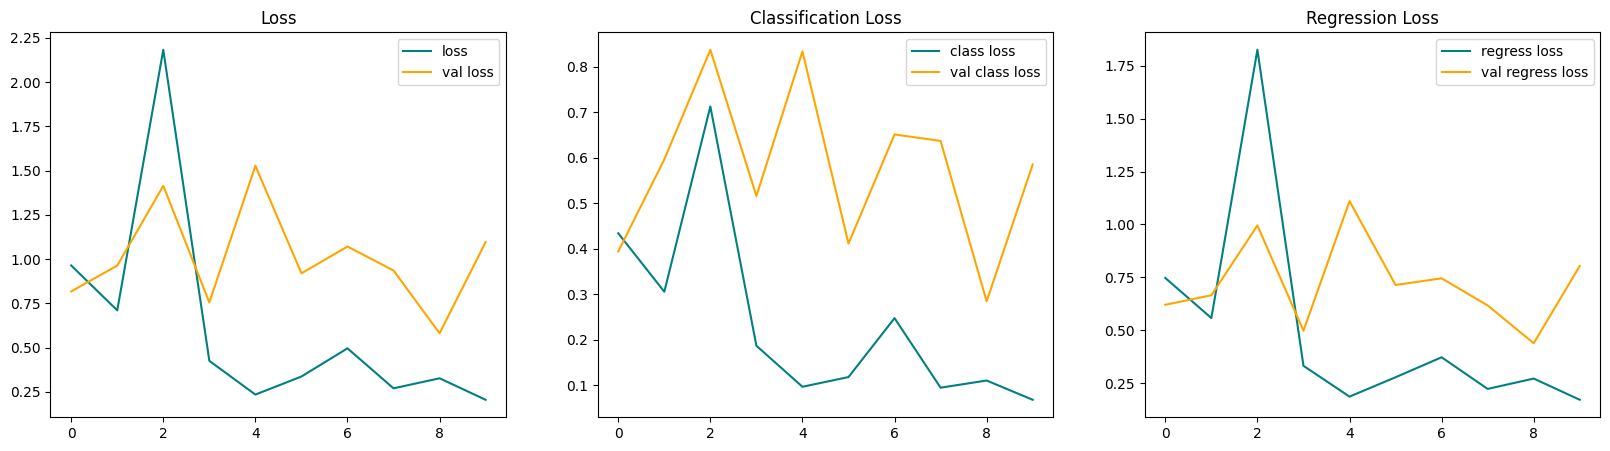

In [197]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(history.history['total_loss'], color='teal', label='loss')
ax[0].plot(history.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(history.history['class_loss'], color='teal', label='class loss')
ax[1].plot(history.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(history.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(history.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [198]:
test_data = test.as_numpy_iterator()
test_sample = test_data.next()

In [199]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 38ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


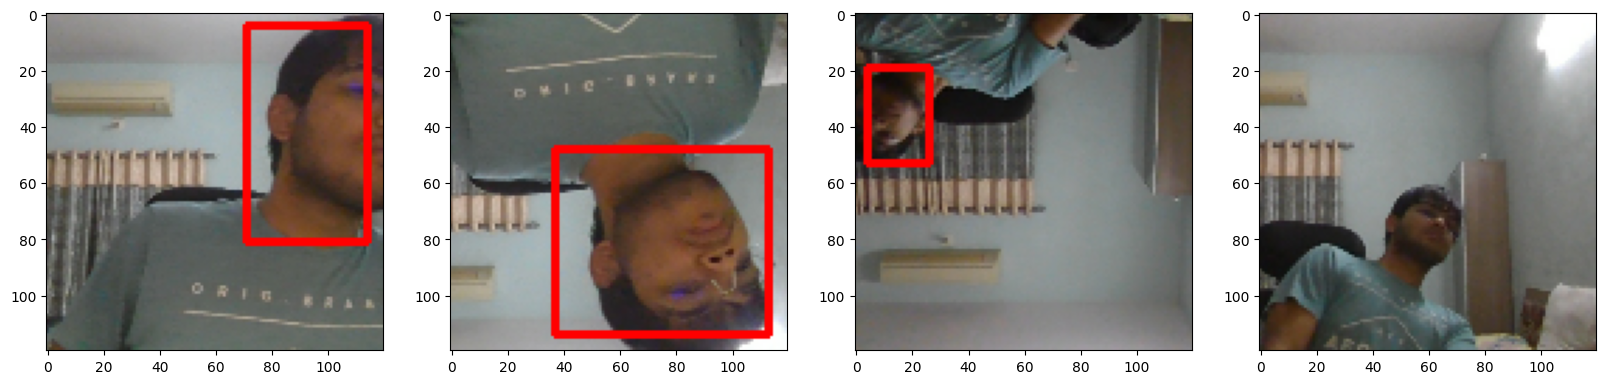

In [200]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx in range(4):
    sample_image = np.copy(test_sample[0])[idx]
    sample_coords = yhat[1][idx]
    if yhat[0][idx] > 0.5:
        cv2.rectangle(sample_image,
                    tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int)),
                    tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int)),
                            (255, 0, 0), 2)
    ax[idx].imshow(sample_image)

In [4]:
from tensorflow.keras.models import load_model

In [202]:
facetracker.save('deepface_detection/facetracker.h5')

/home/rutpatel/Documents/deeplearning/dl/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [5]:
facetracker = load_model('deepface_detection/facetracker.h5')

2024-01-30 22:50:33.068211: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-30 22:50:33.173273: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-30 22:50:33.173506: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [10]:
#realtime test
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('Face Tracking', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 12ms/step
